In [7]:
def toric_code(n, p):
    rows, cols = (n, n)
    A = []
    for i in range(rows):
        col = []
        for j in range(cols):
            col.append('I')
        A.append(col)
    #print(A)

    B = []
    for i in range(rows):
        col = []
        for j in range(cols):
            col.append('I')
        B.append(col)
    #print(B)

    pX = p

    rows, cols = (n, n)
    import random
    #random.seed(1)
    for i in range(rows):
        for j in range(cols):
            ran = random.uniform(0, 1)
            if(ran < pX):
                A[i][j] = 'X'
    #print(A)

    import random
    #random.seed(2)
    for i in range(rows):
        for j in range(cols):
            ran = random.uniform(0, 1)
            if(ran < pX):
                B[i][j] = 'X'
    #print(B)

    sign_matrix = []
    for i in range(rows):
        col = []
        for j in range(cols):
            col.append(1)
        sign_matrix.append(col)
    #print(sign_matrix)

    for i in range(rows):
        for j in range(cols):
            if A[i][j] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
            if B[i][j] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
            if A[i][(j + 1) % cols] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
            if B[(i + 1) % rows][j] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
    #print(sign_matrix)

    import networkx as nx
    G = nx.Graph()
    k = 0
    for i in range(rows):
        for j in range(cols):
            if (sign_matrix[i][j] == -1):
                k = k + 1
                G.add_node(k, coordinates = (i, j))
    #print(G)
    #print(G.nodes[1]['coordinates'])
    #print(G.nodes[2]['coordinates'])
    #print(G.nodes[3]['coordinates'])
    #print(G.nodes[4]['coordinates'])

    for x in range(k):
        for y in range(k):
            if x < y:
                l1 = G.nodes[x + 1]['coordinates']
                l2 = G.nodes[y + 1]['coordinates']
                xdist = abs(l1[1] - l2[1])
                ydist = abs(l1[0] - l2[0])
                dist1 = xdist + ydist
                dist2 = abs(n - xdist) + abs(ydist)
                dist3 = abs(xdist) + abs(n - ydist)
                dist4 = abs(n - xdist) + abs(n - ydist)
                final_dist = min(dist1, dist2, dist3, dist4)
                #print(x, y, final_dist)
                if(final_dist == dist1):
                    flag = 1
                elif (final_dist == dist2):
                    flag = 2
                elif (final_dist == dist3):
                    flag = 3
                else:
                    flag = 4
                G.add_edge(x + 1, y + 1, weight = (-1) * final_dist, direction = flag)
    #print(G)

    matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality = True, weight = 'weight')
    matching = list(matching)
    #print(matching)
    #print(G.nodes[1])
    #print(G.nodes[2])
    #print(G.nodes[3])
    #print(G.nodes[4])
    #print(G.nodes[5])
    #print(G.nodes[6])
    #print(G.edges[(1, 2)])
    #print(G.edges[(4, 3)])
    #print(G.edges[(6, 5)])

    matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality = True, weight = 'weight') # Minimum weight perfect matching
    matching = list(matching) # Matching converted to list
    CC = []

    for edge in matching:
        nodeM = edge[0] # One node of an edge
        nodeN = edge[1] # Another node of an edge
        coordM = G.nodes[nodeM]['coordinates'] # Coordinates of node M
        coordN = G.nodes[nodeN]['coordinates'] # Coordinates of node N
        #print(coordM)
        #print(coordN)

        if (coordM[1] > coordN[1]): # If node M is to the left of node N
            coordM, coordN = coordN, coordM # Swap nodes M and N

        direction = G.edges[edge]['direction'] # Orientation of edge, depending on which we will find the correction path C
        #print(direction)

        if (direction == 1):
            C = []       
            if(coordM[1] != coordN[1]):
                for i in range(coordM[1] + 1, coordN[1] + 1, 1):
                    C.append(('A', coordM[0], i))
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0] + 1, coordN[0] + 1):
                    C.append(('B', j, coordN[1]))
            if(coordM[0] > coordN[0]):
                for j in range(coordM[0], coordN[0], -1):
                    C.append(('B', j, coordN[1]))
            C = list(set(C))
            CC = CC + C
            #print(C)

        if (direction == 2):
            C = []
            i = coordN[1]
            if(coordM[1] != coordN[1]):
                for i in range(coordM[1], 0 - 1, -1):
                    C.append(('A', coordM[0], i))
                for i in range(n - 1, coordN[1], -1):
                    C.append(('A', coordM[0], i))
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0] + 1, coordN[0] + 1):
                    C.append(('B', j, coordN[1]))
            if(coordM[0] > coordN[0]):    
                for j in range(coordM[0], coordN[0], -1):
                    C.append(('B', j, coordN[1]))
            C = list(set(C))
            CC = CC + C

        if (direction == 3):
            C = []
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0], 0 - 1, -1):
                    C.append(('B', j, coordM[1]))
                for j in range(n - 1, coordN[0], -1):
                    C.append(('B', j, coordM[1]))
            if(coordM[0] > coordN[0]):
                for j in range(coordM[0] + 1, n):
                    C.append(('B', j, coordM[1]))
                for j in range(0, coordN[0] + 1):
                    C.append(('B', j, coordM[1]))
            for i in range(coordM[1] + 1, coordN[1] + 1):
                C.append(('A', coordN[0], i))
            C = list(set(C))
            CC = CC + C

        if (direction == 4):
            C = []
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0], 0 - 1, -1):
                    C.append(('B', j, coordM[1]))
                for j in range(n - 1, coordN[0], -1):
                    C.append(('B', j, coordM[1]))
            if(coordM[0] > coordN[0]):
                for j in range(coordM[0] + 1, n):
                    C.append(('B', j, coordM[1]))
                for j in range(0, coordN[0] + 1):
                    C.append(('B', j, coordM[1]))
            if(coordM[1] != coordN[1]):
                for i in range(coordM[1], 0 - 1, -1):
                    C.append(('A', coordN[0], i))
                for i in range(n - 1, coordN[1], -1):
                    C.append(('A', coordN[0], i))
            C = list(set(C))
            CC = CC + C

    # Intersections of the horizontal Logical Z (at position n-1) with correction vector CC
    CC_X = 0
    for i in CC:
        if (i[0] == 'B' and i[1] == n - 1):
            CC_X = CC_X + 1
    #print(CC_X)
    
    # Intersections of the vertical Logical Z (at position n-1) with correction vector CC
    CC_Y = 0
    for j in CC:
        if (j[0] == 'A' and j[2] == n - 1):
            CC_Y = CC_Y + 1
    #print(CC_Y)

    # Intersections of error matrix A with vertical Logical Z (at position n-1)
    #[['X', 'I', 'I'], ['I', 'I', 'I'], ['I', 'I', 'X']]
    A_Y = 0
    for i in range(0, n):
        if (A[i][n-1] == 'X'): A_Y = A_Y + 1
    #print(A_Y)

    # Intersections of error matrix B with horizontal logical Z (at position n-1)
    #[['I', 'I', 'X'], ['X', 'I', 'I'], ['I', 'I', 'I']]
    B_X = 0
    for j in range(0, n):
        if (B[n-1][j] == 'X'): B_X = B_X + 1
    #print(B_X)

    if((CC_X + B_X) % 2 == 0 and (CC_Y + A_Y) % 2 == 0):
        #print("No logical error!")
        return 1
    else:
        #print("Logical error!")
        return 0

In [8]:
import matplotlib.pyplot as plt
error_rate_array_3 = []
for P in range(1, 100, 1):
    count_0 = 0
    count_1 = 0
    for x in range(0, 100):
        n = 3
        p = P/100
        val = toric_code(n, p)
        if (val == 0):
            count_0 = count_0 + 1
        elif (val == 1):
            count_1 = count_1 + 1
    logical_error_rate = (count_0)/(count_0 + count_1)
    error_rate_array_3 = error_rate_array_3 + [logical_error_rate]
    print(logical_error_rate)
print(error_rate_array_3)

0.0
0.0
0.01
0.07
0.06
0.1
0.11
0.16
0.22
0.33
0.3
0.32
0.3
0.31
0.48
0.55
0.47
0.54
0.6
0.5
0.58
0.63
0.64
0.65
0.65
0.7
0.79
0.69
0.78
0.73
0.69
0.72
0.7
0.72
0.72
0.72
0.75
0.81
0.8
0.73
0.82
0.67
0.79
0.78
0.8
0.7
0.76
0.79
0.79
0.69
0.75
0.74
0.71
0.7
0.69
0.72
0.72
0.69
0.74
0.81
0.78
0.71
0.75
0.77
0.78
0.74
0.72
0.78
0.82
0.8
0.8
0.79
0.79
0.78
0.72
0.88
0.8
0.83
0.89
0.84
0.92
0.87
0.82
0.88
0.89
0.96
0.95
0.94
0.98
0.95
0.97
0.97
0.98
0.97
0.98
0.99
1.0
0.99
1.0
[0.0, 0.0, 0.01, 0.07, 0.06, 0.1, 0.11, 0.16, 0.22, 0.33, 0.3, 0.32, 0.3, 0.31, 0.48, 0.55, 0.47, 0.54, 0.6, 0.5, 0.58, 0.63, 0.64, 0.65, 0.65, 0.7, 0.79, 0.69, 0.78, 0.73, 0.69, 0.72, 0.7, 0.72, 0.72, 0.72, 0.75, 0.81, 0.8, 0.73, 0.82, 0.67, 0.79, 0.78, 0.8, 0.7, 0.76, 0.79, 0.79, 0.69, 0.75, 0.74, 0.71, 0.7, 0.69, 0.72, 0.72, 0.69, 0.74, 0.81, 0.78, 0.71, 0.75, 0.77, 0.78, 0.74, 0.72, 0.78, 0.82, 0.8, 0.8, 0.79, 0.79, 0.78, 0.72, 0.88, 0.8, 0.83, 0.89, 0.84, 0.92, 0.87, 0.82, 0.88, 0.89, 0.96, 0.95, 0.94, 0.98, 0.95

In [9]:
import matplotlib.pyplot as plt
error_rate_array_5 = []
for P in range(1, 100, 1):
    count_0 = 0
    count_1 = 0
    for x in range(0, 100):
        n = 5
        p = P/100
        val = toric_code(n, p)
        if (val == 0):
            count_0 = count_0 + 1
        elif (val == 1):
            count_1 = count_1 + 1
    logical_error_rate = (count_0)/(count_0 + count_1)
    error_rate_array_5 = error_rate_array_5 + [logical_error_rate]
    print(logical_error_rate)
print(error_rate_array_5)

0.0
0.0
0.0
0.0
0.02
0.06
0.06
0.12
0.22
0.24
0.3
0.31
0.39
0.37
0.49
0.45
0.57
0.52
0.67
0.7
0.75
0.71
0.73
0.71
0.79
0.66
0.77
0.67
0.68
0.72
0.63
0.74
0.77
0.69
0.7
0.7
0.72
0.77
0.7
0.7
0.73
0.73
0.71
0.79
0.8
0.75
0.75
0.72
0.83
0.82
0.67
0.79
0.74
0.79
0.7
0.73
0.73
0.66
0.69
0.76
0.74
0.71
0.82
0.76
0.66
0.8
0.77
0.65
0.78
0.67
0.78
0.72
0.75
0.76
0.8
0.73
0.8
0.85
0.87
0.83
0.78
0.81
0.86
0.88
0.85
0.91
0.89
0.95
0.95
0.93
0.93
0.99
0.97
1.0
0.99
0.99
1.0
1.0
1.0
[0.0, 0.0, 0.0, 0.0, 0.02, 0.06, 0.06, 0.12, 0.22, 0.24, 0.3, 0.31, 0.39, 0.37, 0.49, 0.45, 0.57, 0.52, 0.67, 0.7, 0.75, 0.71, 0.73, 0.71, 0.79, 0.66, 0.77, 0.67, 0.68, 0.72, 0.63, 0.74, 0.77, 0.69, 0.7, 0.7, 0.72, 0.77, 0.7, 0.7, 0.73, 0.73, 0.71, 0.79, 0.8, 0.75, 0.75, 0.72, 0.83, 0.82, 0.67, 0.79, 0.74, 0.79, 0.7, 0.73, 0.73, 0.66, 0.69, 0.76, 0.74, 0.71, 0.82, 0.76, 0.66, 0.8, 0.77, 0.65, 0.78, 0.67, 0.78, 0.72, 0.75, 0.76, 0.8, 0.73, 0.8, 0.85, 0.87, 0.83, 0.78, 0.81, 0.86, 0.88, 0.85, 0.91, 0.89, 0.95, 0.95, 0.93

In [10]:
import matplotlib.pyplot as plt
error_rate_array_7 = []
for P in range(1, 100, 1):
    count_0 = 0
    count_1 = 0
    for x in range(0, 100):
        n = 7
        p = P/100
        val = toric_code(n, p)
        if (val == 0):
            count_0 = count_0 + 1
        elif (val == 1):
            count_1 = count_1 + 1
    logical_error_rate = (count_0)/(count_0 + count_1)
    error_rate_array_7 = error_rate_array_7 + [logical_error_rate]
    print(logical_error_rate)
print(error_rate_array_7)

0.0
0.0
0.0
0.0
0.02
0.03
0.04
0.19
0.11
0.2
0.3
0.37
0.47
0.47
0.49
0.61
0.61
0.64
0.71
0.76
0.74
0.76
0.82
0.7
0.7
0.79
0.8
0.8
0.77
0.8
0.77
0.64
0.76
0.73
0.78
0.79
0.68
0.8
0.77
0.83
0.76
0.73
0.8
0.74
0.76
0.76
0.77
0.66
0.8
0.71
0.74
0.79
0.7
0.71
0.71
0.78
0.78
0.78
0.84
0.68
0.73
0.75
0.73
0.8
0.73
0.75
0.73
0.69
0.76
0.76
0.75
0.76
0.77
0.81
0.71
0.67
0.77
0.84
0.75
0.78
0.73
0.75
0.84
0.81
0.83
0.89
0.91
0.88
0.93
0.96
0.98
0.99
1.0
0.99
1.0
1.0
1.0
1.0
1.0
[0.0, 0.0, 0.0, 0.0, 0.02, 0.03, 0.04, 0.19, 0.11, 0.2, 0.3, 0.37, 0.47, 0.47, 0.49, 0.61, 0.61, 0.64, 0.71, 0.76, 0.74, 0.76, 0.82, 0.7, 0.7, 0.79, 0.8, 0.8, 0.77, 0.8, 0.77, 0.64, 0.76, 0.73, 0.78, 0.79, 0.68, 0.8, 0.77, 0.83, 0.76, 0.73, 0.8, 0.74, 0.76, 0.76, 0.77, 0.66, 0.8, 0.71, 0.74, 0.79, 0.7, 0.71, 0.71, 0.78, 0.78, 0.78, 0.84, 0.68, 0.73, 0.75, 0.73, 0.8, 0.73, 0.75, 0.73, 0.69, 0.76, 0.76, 0.75, 0.76, 0.77, 0.81, 0.71, 0.67, 0.77, 0.84, 0.75, 0.78, 0.73, 0.75, 0.84, 0.81, 0.83, 0.89, 0.91, 0.88, 0.93, 0.96, 0.

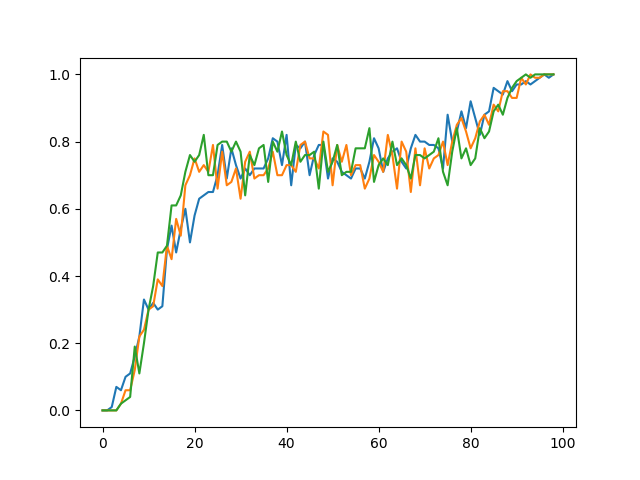

In [11]:
import matplotlib.pyplot as plt
plt.plot(error_rate_array_3)
plt.plot(error_rate_array_5)
plt.plot(error_rate_array_7)
plt.show()